In [19]:
import nltk 
import pandas as pd

In [20]:
texts = pd.read_csv('data/train.csv')
texts.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [21]:
# Word Freq - Find how often each author uses each word

byAuthor = texts.groupby('author')
# byAuthor.head()

In [22]:
wordFreqByAuthor = nltk.probability.ConditionalFreqDist()
wordFreqByAuthor

ConditionalFreqDist(nltk.probability.FreqDist, {})

<ConditionalFreqDist with 4 conditions>


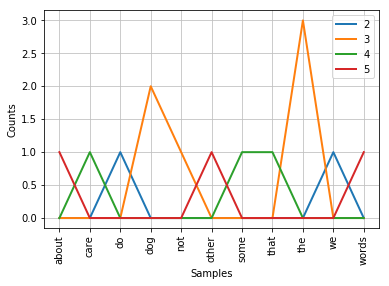

In [23]:
# -> Conditional Freq Dist

from nltk.probability import ConditionalFreqDist
from nltk.tokenize import word_tokenize

sent = "the the the dog dog some other words that we do not care about"

cfdist = ConditionalFreqDist()

for word in word_tokenize(sent):
    condition = len(word)
    cfdist[condition][word] +=1
    
print(cfdist)

#Better way

cfdist = ConditionalFreqDist((len(word), word) for word in word_tokenize(sent))
cfdist[3].freq('the') # freq
cfdist[3]['dog'] # freq

cfdist.plot()

In [24]:
for name, group in byAuthor:
    
    sentences = group['text'].str.cat(sep = ' ')
    
    sentences = sentences.lower()
    
    tokens = nltk.tokenize.word_tokenize(sentences)
    
    frequency = nltk.FreqDist(tokens)
    print(frequency)
    
    
    wordFreqByAuthor[name] = (frequency)
    
wordFreqByAuthor

<FreqDist with 15505 samples and 232139 outcomes>
<FreqDist with 14546 samples and 173971 outcomes>
<FreqDist with 11588 samples and 188820 outcomes>


ConditionalFreqDist(nltk.probability.FreqDist,
                    {'EAP': FreqDist({'this': 1296,
                               'process': 8,
                               ',': 17594,
                               'however': 254,
                               'afforded': 20,
                               'me': 893,
                               'no': 853,
                               'means': 111,
                               'of': 8970,
                               'ascertaining': 4,
                               'the': 14969,
                               'dimensions': 10,
                               'my': 1788,
                               'dungeon': 6,
                               ';': 1354,
                               'as': 1570,
                               'i': 3774,
                               'might': 188,
                               'make': 126,
                               'its': 607,
                               'circuit': 9,
           

In [25]:
for i in wordFreqByAuthor.keys():
    print('blood '+ i)
    print(wordFreqByAuthor[i].freq('blood'))
    
print()

for i in wordFreqByAuthor.keys():
    print('scream '+ i)
    print(wordFreqByAuthor[i].freq('scream'))
    
print()

for i in wordFreqByAuthor.keys():
    print('fear ' + i)
    print(wordFreqByAuthor[i].freq('fear'))

blood EAP
0.00014646397201676582
blood HPL
0.00022992337803427008
blood MWS
0.00022773011333545174

scream EAP
1.7231055531384214e-05
scream HPL
9.196935121370803e-05
scream MWS
2.6480245736680435e-05

fear EAP
0.00010338633318830528
fear HPL
0.0005748084450856752
fear MWS
0.0006196377502383222


In [26]:
testSentence = 'It was a dark and stormy night.'

preProcessedSentence = nltk.tokenize.word_tokenize(testSentence.lower())

#init
testProb = pd.DataFrame(columns = ['author', 'word', 'probability'])

# Prob of an author using that word
for i in wordFreqByAuthor.keys():
    for j in preProcessedSentence:
        
        wordFreq = wordFreqByAuthor[i].freq(j) + 0.000001 #(smoothening)
        
        output = pd.DataFrame([[i, j, wordFreq]], columns = ['author', 'word', 'probability'])
        
        testProb = testProb.append(output, ignore_index = True)

testProb

,author,word,probability
0,EAP,it,0.010021
1,EAP,was,0.009603
2,EAP,a,0.020260
3,EAP,dark,0.000251
4,EAP,and,0.024697
5,EAP,stormy,0.000005
6,EAP,night,0.000630
7,EAP,.,0.032977
8,HPL,it,0.008060
9,HPL,was,0.012555


In [27]:
testProbByAuthor = pd.DataFrame(columns =['author', 'joint_prob']) #init

for i in wordFreqByAuthor.keys():
    
    oneAuth = testProb.query('author == "' + i + '"')
    jointProb = oneAuth.product(numeric_only= True)[0]
    
    output = pd.DataFrame([[i, jointProb]], columns = ['author','jointProb'])
    testProbByAuthor = testProbByAuthor.append(output, ignore_index = True)
    
    
# Find the author who has the highest prob
testProbByAuthor.loc[testProbByAuthor['jointProb'].idxmax(),'author']

'HPL'

In [ ]:
tesxts